<a href="https://colab.research.google.com/github/nuriaprol/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica1AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 6.</font>
##### Laura Lirón Carrión, Alberto Muñoz Gutierrez, Nuria Prol Vecoña.



# <font color='00008B'>PRÁCTICA 1.</font>
#####Aprendizaje automático


---


*El objetivo de esta práctica es trabajar los principios básicos de las Redes de Neuronas Artificiales.*


---

Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

---

En este proyecto, desarrollaremos un modelo de Red de Neuronas Artificiales (RNA) con la capacidad de reconocer y clasificar imágenes de ropa en diversas categorías. El enfoque se centrará en la utilización de Keras, una biblioteca de aprendizaje profundo de código abierto, para llevar a cabo la definición, configuración, entrenamiento, evaluación y mejora de la red neuronal. Utilizaremos el conjunto de datos Fashion-MNIST, el cual es una versión similar al conjunto MNIST utilizado para el reconocimiento de dígitos, pero en lugar de dígitos, consta de imágenes de prendas de ropa en baja resolución (28 x 28 píxeles).

Fashion-MNIST es un recurso que contiene 70,000 imágenes en escala de grises distribuidas en 10 categorías, cada una representando una prenda de vestir específica. Este conjunto de datos es una herramienta valiosa para tareas de clasificación de imágenes, y nos brinda la oportunidad de explorar y aplicar conceptos fundamentales en el campo del aprendizaje profundo, incluyendo la definición de arquitectura de redes, la selección de optimizadores, la elección de funciones de pérdida y la evaluación de la precisión del modelo en datos de prueba. A través de este proyecto, buscaremos crear un modelo eficiente que pueda realizar predicciones precisas en la clasificación de prendas de ropa basadas en imágenes.

---
Importamos las librerías requeridas para el programa.

*   `TensorFlow`: Utilizada para construir y entrenar las redes neuronales dentro de esta biblioteca hay un apartado de Keras que necesitaremos más adelante ya que destaca por su facilidad de uso y capacidad para construir rápidamente los modelos de aprendizaje.
*   `Numpy`: Para trabajar con matrices.
*   Matplotlib: Biblioteca para poder crear gráficos y visualizaciones.
*   `Keras`:Sirve para construir y entrenar las redes neuronales.
Importado desde la biblioteca Keras:
*   `Models`: Es la estructura de las capas/Layers conectadas en forma de secuencia.
*   `Layers`: Son los componentes básicos de una red neuronal. Cada Layer (Capa) realiza una operación especifica dentro de la red neuronal.
*   `Flatten`: En el caso de nuestro proyecto al usar 'capas densas' debemos transformar nuestra matriz de datos multidimensional (28x28píxeles) en una matriz unidimensional (784 elementos) para pasarlo a la capa densa.

Continuamos importando los datos de la red neuronal con la función `fashion_mnist` que se basa en imágenes de los artículos de Zalando.

Por otro lado `to_categorical` sirve para guardar las etiquetas en formato de vectores en este caso del 0-9 cada número está asignado a una prenda de ropa.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from keras import models
from keras import layers
from keras.layers import Flatten

from keras.datasets import fashion_mnist
from keras.utils import to_categorical

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Comprobamos que tenemos una CPU disponible y mostramos la versión de `TensorFlow`


In [2]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

GPU Available: []
2.13.0


Cargamos los datos en dos tuplas distintas, la de entrenamiento y la de evaluación y vemos que obtenemos 60.000 imagenes y etiquetas para el entrenamiento y 10.000 para la evaluación.


In [3]:
#Imágenes
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.size)
print(test_images.shape)
print(test_labels.size)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
(10000, 28, 28)
10000


A continuación hacemos que el programa muestre todos los tipos de prenda que podemos encontrar en la base de datos y asignamos un nombre a cada uno para que no pueda haber confusiones ya que `label` es un número.

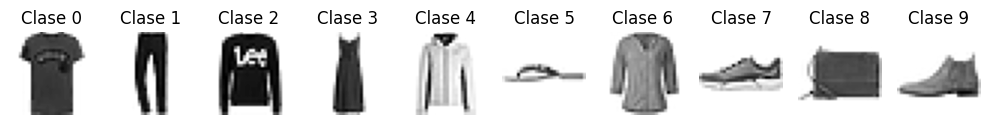

In [4]:
class_name = ["Top", "Pantalón", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolsa", "Botín"]

# Creación una lista para realizar un seguimiento de las clases que ya se han mostrado
classes_shown = [False] * 10

fig, axes = plt.subplots(1, 10, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5)

# Se muestra una imagen de cada clase en orden de 0 a 9
for i in range(len(test_images)):
    label = test_labels[i]
    if not classes_shown[label]:
        axes[label].imshow(test_images[i], cmap=plt.cm.binary)
        axes[label].set_title(f'Clase {label}')
        axes[label].axis('off')
        classes_shown[label] = True

    # Si ya se han mostrado todas las clases, se rompe el bucle
    if all(classes_shown):
        break

# Ajustar el espacio entre las subparcelas y mostrar la figura
plt.tight_layout()
plt.show()

In [5]:
train_labels = to_categorical(train_labels) #Codificación one - hot
test_labels = to_categorical(test_labels)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


> **Codificación one - hot:** Tiene como objetivo representar variables categóricas como vectores binarios.
En esta técnica, cada categoría única se representa como un vector con todos los elementos en cero, excepto uno, que tiene un valor de uno para indicar la presencia de esa categoría. Cada categoría se representa ahora como un vector de longitud igual al número de categorías únicas en la variable categórica.

Una vez hemos cargado todos los datos, realizamos las funciones necesarias para el funcionamiento correcto del programa.

**CONSTRUCCIÓN Y ENTRAMIENTO DE LA RNA**

Se crea una funión para construir, compilar y entrenar una red neuronal utilizando Keras. Una red neuronal es un sistema compuesto por neuronas, elementos de procesamiento simples, concetados entre sí (Red), cuyo comportamiento está determinado y los pesos de sus conexiones.Los pesos son los que contienen la memoria del a red.



Las redes neuronales que se van a tratar se entrenan apartir de apredinzaje supervisado: Recibe pares de entradas y salidas, entradas asociadas a una etiqueta, el sistema aprende de una función que relaciona cada imagen con su etiqueta (clase) correspondiente.


Se crea un **modelo secuencial** network que representa la arquitectura de la red neuronal. La arquitectura de la red es un conjunto de reglas que define la forma en que se conectan las distintas capas (elemento básico de procesamiento y extraccion de representamiento de datos).

Un modelo secuencial es una pila lineal de capas de neuronas. Es decir, que va de principio a fin sin ciclos. El orden de las capas en un modelo secuencial importa, va una capa despues de otra.


`network.add(Flatten(input_shape=(28 * 28,)`

La primera capa es una **capa de aplanamiento (Flatten)** que convierte las imágenes de entrada (que son matrices 2D de 28x28 píxeles) como se vió al principio del programa en un vector unidimensional de 784 elementos.
Se utiliza ya que las capas densas requieren datos unidimensionales para funcionar correctamente.

`network.add (layers.Dense(neurona, activation=activacion`

Luego, se agrega una **capa densa (Dense)** con el número de neuronas necesarias para cada modelo y una función de activación. Esta capa es la capa oculta de la red y puede tener diferentes números de neuronas y funciones de activación según los argumentos que se pasen a la función entrenamiento.

Una capa densa quiere decir que cada neruona de la capa se conecta concada neurona de la siguiente capa (todas con todas). En este caso significa que cada neurona está conectada con cada uno de los 784 pixeles de las imágenes.
Al ser la primera capa de la red, es esta quien recibe los "estímulos" externos, las características simples, y a medida que se avanza en el sistema  los datos se vuelven más abstractos.

A cada capa le corresponde una **función de activación**, para las de entrada se utilizarán:

*   **Relu**:

<img src="https://miro.medium.com/v2/resize:fit:714/1*njuH4XVXf-l9pR_RorUOrA.png" alt="Función Relu" width="200">



La función RELU devuelve únicamente valores positivos incluyendo el 0; si la entrada es x, siendo x mayor a cero, entonces la salida será x también, en el caso de que la entrada sea menor o igual a cero entonces se devolverá cero.
Al no devolver valores negativos previene problemas de desvanecimiento de gradiente*. Un problema que si puede presentar RELU es que una neurona produzca siempre una salida de 0, ocasionado que sus pesos no se actualicen y no aprenda.

> *Desvanecimiento de gradiente: el gradiente se vuelvo muy pequeño al propagarse hacia atrás, hasta volverse insignificantes ocasionando que las actualizaciones de peso sean insignificantes y como resultado, la red neuronal tiene dificultades para aprender y ajustarse a los datos de entrenamiento.

*   **Sigmoid**:

<img src="https://ml4a.github.io/images/figures/sigmoid.png" alt="Función Sigmoid" width="200">


La función sigmoide devuelve únicamente valores entre 0 y 1; cuanto más grande sea la entrada más se acerca el valor que devuele la función a 1, en el caso de que la entrada sea cero, la salida será 0.5 y cuanto más negativa sea la entrada, la salida se acercará más a cero. Puede que hayan casos en donde la función ocasione desvanecimiento de gradiente cuando la entrada es muy grande en valor absoluto. Otro problema es al no ser una función centrada en cero puede lentizar la convergencia en algunos casos.

`network.add(layers.Dense(10, activation='softmax'))`

Ahora, se agrega la capa de salida. Esta capa es una capa densa que se conecta completamente con todas las neuronas de la capa anterior. En este caso, hemos configurado la capa de salida para tener 10 neuronas, lo cual es apropiado porque estamos trabajando en un programa de clasificación de imágenes de ropa en 10 categorías diferentes. Cada neurona en esta capa de salida representará una de las posibles clases de ropa a las que pueden pertenecer las imágenes de entrada. Esta capa emplea la función de activación softmax, que se utilizará en todos los modelos en estudio. La razón detrás de esta elección es que deseamos que la salida de la red sea una representación de la probabilidad de que una imagen pertenezca a cualquiera de las clases disponibles.

*  **Softmax**:

La función softmax devuelve únicamente valores entre 0 y 1, que cumplen que la suma de los 10 valores para cada imagen será 1. Se puede interpretar como una distribución de probabilidad sobre las diferentes categorías  y la clase con la probabilidad más alta se toma como la predicción final.

`network.summary()`

Una vez que esta creada la arquitectura de la red, se utiliza summary para  imprimir un resumen de la arquitectura de la red, que muestra el número de parámetros entrenables en cada capa y el tipo de salida.

1.   **Flatten**:
*Tipo de salida* = (None, 784) El None se refiere a que toma un conjunto de datos con un lote o batch de dimension variable con 784 valores en cada lote. Durante el entrenamiento, cuando la red se alimente, se definirá la dimensión ya que se puede ajustar según se necesite.

*Param* = Esta capa no tiene parámetros ajustables, ya que no realiza ninguna operación de cálculo con pesos. Su único propósito es reorganizar los datos de entrada.

2.   **Capa de entrada (Densa)**:

*Tipo de salida* = (None, 10) La capa densa produce una salida que tiene 10 valores en cada lote, pero el tamaño del lote en el resumen no está fijo y puede variar según cómo se configure durante el entrenamiento.

*Param* = Los parámetros que se entrenan son: 784 (pixeles), entrada de la capa * n (número de neuronas de la capa) + n (cada neurona tiene un sesgo que se entrena) esto da un total de: 784 * n + n.

3.   **Capa de salida (Densa)**:

*Tipo de salida* =(None, 10)

*Param* = Los parámetros que se entrenan en la capa de salida en este caso son 110 = n (número de neuronas que llegan de la capa anterior) * 10 (número de neuronas de esta capa) + 10 (sesgo de cada neurona) dando un total de 110.

  `network.compile(optimizer=optimizador,
                loss='categorical_crossentropy',
                metrics=['accuracy'])`

Se compila ahora la red de neuronas, dentro del compilador se especifica que **optimizador** se utilizará. El optimizador se utilizará para ajustar los pesos de la red durante el proceso de entrenamiento. El optimizador es un algoritmo que se encarga de minimizar la función de pérdida (loss function) al ajustar los pesos. Se utilizarán los siguientes:


*   **Sgd:** Se basan en descenso de gradiente* pero en vez de calcularlo en todo el conjunto de datos, este lo hace en pequeños lotes (batchs) al azar, útil para trabajar en grandes conjuntos de datos. Es altamente escalable (rendimiento constante) sin importar el tamaño de entrada. Encuentra una solución que se acerce al mínimo global, ya que se busca minimizar la función de pérdida. Tiene una tasa de aprendizaje fija. SGD puede quedar atrapado en mínimos locales.

*   **Rmsprop:** Es una variante del SGD pero este optimizador ajusta la tasa de aprendizaje de cada parámetro. El algoritmo RMSprop utiliza un promedio móvil exponencial de los cuadrados de los gradientes previos para ajustar adaptativamente la tasa de aprendizaje. Esto significa que los gradientes más grandes tendrán un impacto más significativo en la actualización de los parámetros, mientras que los gradientes más pequeños tendrán un efecto más leve.

*   **Adam:** El optimizador Adam utiliza estimaciones del primer y segundo momento de los gradientes (media y varianza) para adaptar la tasa de aprendizaje de manera adaptativa para cada parámetro del modelo. Al igual que en rmsprop, los gradientes más grandes tendrán un impacto más significativo en la actualización de los parámetros, mientras que los gradientes más pequeños tendrán un efecto más leve.

La elección del mejor optimizador depende del problema específico.

> *Descenso de gradiente: método iterativo para encontrar el mínimo de una función a través del ajuste de los parámetros, se itera hasta que la función de pérdida se minimice o converga a un valor aceptable.

Después se asigna la **funcion de pérdida** que se utilizará para calcular la diferencia entre las predicciones del modelo y las etiquetas reales. En este caso, se utiliza 'categorical_crossentropy'. Al calcular la pérdida o la precisión, la red obtiene una medida cuantitativa de su rendimiento en los datos de entrenamiento.
Utilizando la función de pérdida, la red puede ajustar sus parámetros internos mediante la retropropagación del error.

Categorical crossentropy: mide la diferencia entre las probabilidades predichas por el modelo y las etiquetas reales de las clases, se utiliza en problemas de clasificación.

`network.fit(train_images, train_labels, epochs=epocas, batch_size=128)`

  Una vez que está definida la arquitectura **se entrena la red**. Utilizando las imágenes de entrada con sus etiquetas asociadas del conjunto fashion_mnist.
El método fit se utiliza para entrenar un modelo ajustando los parámetros del mismo utilizando un algoritmo de optimización seleccionado. Posteriormente se especifican el número de epocas, que se refiere al número de veces que el modelo pasará por el proceso de entrenamiento. Por último el batch size, es el número de imágenes que se utilizan en cada iteración. Entre más pequeño sea el batch size más probable es que el modelo se sobreentrene.

El **número de ajustes** que se relizarán será: 60,000 (número de imágenes de entrenamiento) / 128 (tamaño del lote) * e (número de épocas).

Una vez realizado esto la red estará entrenada.


In [6]:
def entrenamiento (optimizador, neurona, activacion, epocas, lote):

  network = models.Sequential()
  network.add(Flatten(input_shape=(28 , 28,)))
  network.add (layers.Dense(neurona, activation=activacion))
  network.add(layers.Dense(10, activation='softmax'))

  network.summary()

  network.compile(optimizer=optimizador,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  np.set_printoptions(precision=2, suppress=True, linewidth=145)

  network.fit(train_images, train_labels, epochs=epocas, batch_size=lote)


  return network

Se crea otra función para la creación y entranamiento de la red de neurona con los siguientes cambios:


1.   `train_labels = train_labels.astype(np.int)`
2.   `loss='sparse_categorical_crossentropy'`

Se cambia el tipo de datos de la variable train labels a números enteros, este cambio es necesario para usar el optimizador sparse_categorical_crossentropy ya que este necesita las etiquetas en enteros a diferencia del categorical crossentropy que necesita las etiquetas en codificación one-hot. La codificacion con sparse_categorical_crossentropy es más eficiente al usae enteros y en cuanto al rendimiento no hay una diferencia significativa.

In [7]:
def entrenamiento2 (optimizador, neurona, activacion, epocas, lote):

  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  train_images = train_images.astype('float32') / 255
  test_images = test_images.astype('float32') / 255

  network = models.Sequential()
  network.add(Flatten(input_shape=(28 , 28,)))
  network.add (layers.Dense(neurona, activation=activacion))
  network.add(layers.Dense(10, activation='softmax'))

  network.summary()

  network.compile(optimizer=optimizador,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  np.set_printoptions(precision=2, suppress=True, linewidth=145)

  network.fit(train_images, train_labels, epochs=epocas, batch_size=lote)

  return network

**EVALUCION MODELO DE RNA**

Comenzaremos calculando la pérdida y precisión del modelo evaluando los datos de prueba. `test_loss` que es el calculo de la pérdida, hará refencia a cómo de bien/mal se ajusta el modelo a las `test_images`, mientras que `test_acc` a la precisión, exactitud y proporción de predicciones correctas realizadas por el modelo en los datos de prueba.

`test_loss, test_acc = modelo.evaluate(test_images, test_labels)`



In [8]:
def evaluar (modelo):

  test_loss, test_acc = modelo.evaluate(test_images, test_labels)

  print('\nLa pérdida de la red sobre los datos de entrenamiento:', test_loss)
  print('La exactitud de la red sobre los datos de entrenamiento.:', test_acc)
  print("\n\n")

  return None

**PREDICCIÓN DE VALORES**:

Ahora haremos predicicciones utilizando los modelos de redes neuronales previamente entrenados. Una predicción es una suposición sobre el resultado final. En este caso los modelos que ya han sido entrenados en  `def entrenamiento (optimizador, neurona, activacion, epocas)` utilizan la información para hacer predicciones sobre imágenes nuevas o no vistas.

Primero tomamos imagenes de prueba y el modelo procesa la imagen a través de sus capas y realiza cálculos para obtener las predicciones. Esta predicción es un array de las probabilidades de que la imagen test pertenezca a cada una de las clases que tenemos. Es decir, cada valor nos muestra la probabilidad de que la imagen pertenezca a un top, pantalon, suéter...
>`predictions = modelo.predict(test_images)`

Guardamos en `pred` las probabilidades calculadas para la imagen de la posición j.

La función `np.argmax`se utiliza para encontrar el valor del array más grande, esto nos sirve para saber qué clase le ha asignado el modelo a la imagen.
>`indice = np.argmax(predictions[j])`

Nos aseguramos de que las predicciones se hayan hecho correctamente, sumando todos los porcentajes, comprobando que el valor es 1.

>`suma=(np.sum(predictions[j]))`

Por último mostramos cúal es la predicción del programa.

In [9]:
def prediccion(modelo, j):

  predictions = modelo.predict(test_images)

  #Lista de prob de que sea cada elemento
  pred = predictions[j]

  #Índice predicción
  indice = np.argmax(predictions[j])

  #La suma debe ser 1
  suma=(np.sum(predictions[j]))

  #Predicción a la clase que pertenece
  clase = class_name[indice]

  print(f"\nSe predice que la imagen {j+1} es {clase} ")
  print(f"El vector representa una lista con todas las posibilidades de que sea cada elemento {pred}")
  print(f"Suma de probabilidades: {suma}")

  return predictions

**DISTRIBUCIÓN DE PROBABILIDADES**

Vamos a mostrar la imagen junto con la información sobre la predicción y la etiqueta real.
Extraemos las probabilidades que el modelo a asignado a todas las clases de la imagen, además de la etiqueta real y la imagen de esta forma aislamos los datos relevantes que utilizaremos para representar la imagen.

> `predictions_array, tl, img = predictions_array[m], true_label[m], img[m]`

Eliminamos la cuadrícula del gráfico, las lineas del eje x y del eje y para que este esté limpio y podamos ver con claridad las imágenes y probabilidades.
>`plt.grid(False),  plt.xticks([]),  plt.yticks([])`

Tomamos la imagen y la mostramos en el gráfico con una escala de colores negro-blanco. La forma de represtar los píxeles será en blanco cuando tengan un valor alto y en nergo cuando el valor sea pequeño.

Vemos cual es la predicción de la etiqueta y la etiqueta real de la imagen,  
así determinamos si la predicción es correcta o no. Si la clase predicha es igual a la real, se le asigna el color azul a la variable. En caso contrario si la clase predicha es distinta a la real, se le asigna el color rojo.


Ahora mostramos el grafico de barras usando la misma metodología.

In [10]:
def plot_image(m, predictions_array, true_label,img):


  predictions_array, tl, img = predictions_array[m], true_label[m], img[m]


  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  tl = np.argmax(tl)



  if predicted_label == tl:
      color = 'blue'
  else:
      color = 'red'

  print(predicted_label)

  plt.xlabel("{} {:2.0f}% ({})". format(class_name[predicted_label],
                                        100*np.max(predictions_array),
                                        class_name[tl]),
                                        color=color)

def plot_value_array(m, prediction_array, true_label):

  prediction_array, true_label = prediction_array[m], true_label[m]

  true_label = np.argmax(true_label)

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10),prediction_array,color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.**

---
---

**1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.**

**redes = [
        ('sgd', 10, 'relu', 5, 90),
        ('rmsprop', 10, 'relu', 5, 90),
        ('sgd', 10, 'sigmoid', 5, 90),
        ('rmsprop', 10, 'sigmoid', 5, 90),
        ('sgd', 512, 'relu', 5, 90),
        ('rmsprop', 512, 'relu', 5, 90),
        ('sgd', 512, 'sigmoid', 5, 90),
        ('rmsprop', 512, 'sigmoid', 5, 90)
    ]**

Se utiliza el aprendizaje minilote el cual es un equilibtio entre descenso de gradiente en lotes y desccenso de gradiente estocástico, este usa el metodo de descenso de gradiente en lote a subconjuntos más pequeños de datos.

En los 8 modelos se definirá un tamaño de lote de 90 imágenes, para definir este número se probó previamente 128 y 32. En el caso de elegir 32 se obtenía una buena precisión pero el tiempo de ejecución aumentaba de manera significativa y para el caso de 128 el tiempo se reducía pero la precisión también, es por eso que se eligió 90 como punto medio.

**10 NEURONAS**

Las diferencias entre el Modelo 1 y el Modelo 2 se limitan al optimizador utilizado. Se observan cambios significativos al analizar las primeras 10 imágenes. En el caso del optimizador RMSprop, se registra una pérdida menor (indicativo de un error menos significativo), lo que, a su vez, conduce a una mayor precisión en la representación gráfica. En ambos modelos, no se evidencia un sobreentrenamiento sustancial, ya que la precisión en la evaluación de los datos de prueba se asemeja a la de los datos de entrenamiento al concluir las 5 épocas, o las diferencias son mínimas.

> *Sobreentrenamiento: Si la precisión del conjunto de prueba es menor que la de entrenamiento significa que existe sobreentrenamiento. El modelo puede dejar de funcionar y únicamente reconocer los datos con los que ha entrenado, por lo que se buscan los datos necesarios para generalizar sin ajustar demasiado.

Ahora, centrándonos en los Modelos 1 y 3, la diferencia radica en la función de activación utilizada (ReLU o sigmoide), ambos con el mismo optimizador (SGD) y 10 neuronas. Se destaca que con la función sigmoide, la pérdida es considerablemente mayor en comparación con ReLU. El error en la predicción de datos es más pronunciado al emplear la función sigmoide, ya que las redes neuronales que usan ReLU como función de activación pueden aprender representaciones más complejas de los datos, lo que las hace más efectivas para capturar patrones en datos de alta dimensionalidad. Por otro lado, la función sigmoide tiende a "aplanar" las representaciones, lo que puede limitar la capacidad de la red en este contexto. Al igual que en los casos anteriores, no se observa un sobreentrenamiento claro.

Entre las cuatro redes que cuentan con 10 neuronas, las que muestran un desempeño menos favorable son los casos 1 y 3. Una similitud clave entre estos casos es el uso del optimizador SGD. Por lo tanto, podemos concluir que el optimizador RMSprop demuestra ser más eficaz para abordar nuestro problema. RMSprop tiende a converger más rápido debido a su capacidad para adaptar la tasa de aprendizaje y disminuir la oscilación en la dirección de los gradientes.

En contraste, los casos 2 y 4 emplean RMSprop y se distinguen principalmente por la función de activación. El Modelo 2, que utiliza ReLU, exhibe una pérdida ligeramente menor, aunque esta diferencia no es sustancial.

---

**512 NEURONAS**

Se analizan ahora los 4 modelos siguientes que usan 512 neuronas de entrada.

Al igual que ocurre con los modelos de 10 neuronas, el peor rendimiento se observa en la red que utiliza el optimizador SGD y la función de activación sigmoide. Este modelo presenta la pérdida más elevada y el error más significativo. Cabe destacar que el modelo de 10 neuronas, con las mismas entradas, muestra un desempeño aún peor.

El modelo que presenta un desempeño sobresaliente es aquel que incorpora la función de activación ReLU en combinación con el optimizador SGD. Este modelo logra la menor función de pérdida, lo que indica una precisión superior en la tarea de predicción.

A raíz de estos resultados, podemos llegar a la conclusión de que el modelo más eficaz es el Modelo 6 = ('rmsprop', 512, 'relu', 5, 90), mientras que el menos eficiente es el Modelo 4 = ('sgd', 10, 'sigmoid', 5, 90). El primero destaca por su capacidad para adaptarse y aprender de manera efectiva, mientras que el segundo se encuentra en desventaja debido a su elección de optimizador y función de activación, lo que resulta en un rendimiento inferior.

---
---

**2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos**

Resumen de la arquitectura de la red, que muestra el número de parámetros entrenables en cada capa y el tipo de salida

> `('sgd', 10, 'relu', 5, 90)`

1.   **Flatten**:

*Tipo de salida* = (None, 784), None: La capa de salida se adapta automáticamente a la capa anterior. 784: Datos de imágenes de 28x28 píxeles (28 * 28 = 784).

*Param* = 0, Esta capa no tiene parametros ajustables.

2.   **Capa de entrada (Densa)**:

*Tipo de salida* = (None, 10), None: La capa de salida se adapta automáticamente a la capa anterior. 10: Produce una salida que tiene 10 valores en cada lote.

*Param* = 7850 = 784 * 10 + 10 parámetros entrenables. (784 ==> capa anterior, 10 ==> neuronas)

3.   **Capa de salida (Densa)**:

*Tipo de salida* =(None, 10)

*Param* = 110 = 10 * 10 + 10 (10 ==> capa anterior, 10 ==> neuronas)

Se entrenan los 7,960 parámetros.

> `('rmsprop', 10, 'relu', 5, 90)`

> `('sgd', 10, 'sigmoid', 5, 90)`

> `('rmsprop', 10, 'sigmoid', 5, 90)`

1.   **Flatten**:

*Tipo de salida* = (None, 784)

*Param* = 0, Esta capa no tiene parametros ajustables.

2.   **Capa de entrada (Densa)**:

*Tipo de salida* = (None, 10)

*Param* = 7850 = 784 * 10 + 10 parámetros entrenables. 784 ==> capa anterior, 10 ==> neuronas)

3.   **Capa de salida (Densa)**:

*Tipo de salida* =(None, 10)

*Param* = 110 = 10 * 10 + 10 (10 ==> capa anterior, 10 ==> neuronas)

Se entrenan los 7,960 parámetros. Estos parámetros van a pasar por  3, 335 ajustes = 60.000 (imágenes) / 90 (batch size) * 5 (épocas).

> `('sgd', 512, 'relu', 5, 90)`

> `('rmsprop', 512, 'relu', 5, 90)`

> `('sgd', 512, 'sigmoid', 5, 90)`

> `('rmsprop', 512, 'sigmoid', 5, 90)`


1.   **Flatten**:

*Tipo de salida* = (None, 784)

*Param* = 0, Esta capa no tiene parametros ajustables.

2.   **Capa de entrada (Densa)**:

*Tipo de salida* = (None, 512)

*Param* = 401920 = 784 * 512 + 512 parámetros entrenables. (784 ==> capa anterior, 512 ==> neuronas)

3.   **Capa de salida (Densa)**:

*Tipo de salida* =(None, 10)

*Param* = 5130 = 512 * 10 + 10 (512 ==> capa anterior, 10 ==> neuronas)

Se entrenan los 407,050 parámetros. Estos parámetros van a pasar por  3, 335 ajustes = 60.000 (imágenes) / 90 (batch size) * 5 (épocas).

---
---

**4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba**

**Test_loss** representa la pérdida calculada por el modelo en el conjunto de prueba. La pérdida es una medida de cuán bien se ajusta el modelo a los datos de prueba. Cuanto menor sea el valor de la pérdida, mejor será el rendimiento del modelo en el conjunto de prueba.

La variable **test_acc** representa la precisión del modelo en el conjunto de prueba. La precisión es una métrica que muestra qué porcentaje de las muestras del conjunto de prueba se clasifican correctamente.

`('sgd', 10, 'relu', 5, 90)`

Después de completar el entrenamiento, el primer modelo tiene una pérdida de 0.57 y una precisión de 0.8010. Sin embargo, al evaluar el modelo con los datos de prueba, observamos que la pérdida se mantiene en 0.57, pero la precisión disminuye ligeramente a 0.8009. Esta disminución en la precisión sugiere un ligero sobreentrenamiento en el modelo.

`('rmsprop', 10, 'relu', 5, 90)`

El segundo modelo muestra una pérdida de 0.4559 y una precisión de 0.8414 al finalizar el proceso de entrenamiento. Posteriormente, al realizar la evaluación, la pérdida permanece en 0.4559 y la precisión se mantiene en 0.8414. Esto indica que no hay evidencia de sobreentrenamiento en los datos, ya que la precisión se mantiene constante entre el conjunto de entrenamiento y el conjunto de prueba.

`('sgd', 10, 'sigmoid', 5, 90)`

Durante el entrenamiento del tercer modelo, se registró una pérdida de 1.1834 y una precisión de 0.6672. Al evaluar el modelo, los valores se mantuvieron prácticamente sin cambios, con una pérdida de 1.1833 y una precisión de 0.6672. Esto indica que, como mencionamos previamente, el tercer modelo presenta un bajo rendimiento debido a la alta pérdida registrada.

`('rmsprop', 10, 'sigmoid', 5, 90)`

El cuarto modelo muestra una precisión de 0.8321 y una pérdida de 0.4922 después de 5 épocas de entrenamiento. Sin embargo, al evaluarlo, la pérdida disminuye ligeramente a 0.4921, y la precisión también disminuye a 0.8320. Esta disminución en la precisión con los datos de prueba, a pesar de la disminución de la pérdida, sugiere la presencia de sobreentrenamiento en el modelo, ya que parece que se está ajustando demasiado a los datos de entrenamiento y no generaliza tan bien con los datos de prueba.

`('sgd', 512, 'relu', 5, 90)`

El primer modelo, que utiliza 512 neuronas, al finalizar el entrenamiento, registra una pérdida de 0.5017 y una precisión de 0.8287. Al evaluarlo con los datos de prueba, la pérdida disminuye ligeramente a 0.5016, mientras que la precisión se mantiene constante en 0.8287.

`('rmsprop', 512, 'relu', 5, 90)`

El sexto modelo exhibe una pérdida de 0.3572 y una precisión de 0.8728 al concluir el entrenamiento. Sin embargo, en la fase de evaluación, la pérdida se reduce ligeramente a 0.3571 y la precisión disminuye a 0.8727. A pesar de ésta disminución mínima en la precisión, este modelo sigue destacando, ya que presenta la menor pérdida y una alta precisión, lo que lo convierte en el que tiene un rendimiento más sobresaliente en comparación con los otros.

`('sgd', 512, 'sigmoid', 5, 90)`

La pérdida es de 0.6887 y la precisión alcanza 0.7630 al adaptarse a los datos de entrenamiento. Al evaluarlo con los datos de prueba, la pérdida se mantiene en 0.6887, y la precisión también en 0.7630.

`('rmsprop', 512, 'sigmoid', 5, 90)`

El octavo y último modelo muestra la misma pérdida y precisión tanto al finalizar el entrenamiento como en la evaluación. La pérdida se mantiene en 0.4167 y la precisión se estabiliza en 0.8471.

---
---

**5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6a imagen de test (test_images[5])**

Los 8 modelos coinciden en la predicción de que la sexta imagen en el conjunto de datos es un pantalón, y sus respectivos vectores de predicciones se presentan a continuación.

Una vez más, el tercer modelo muestra el peor rendimiento con el siguiente vector de predicciones: [0.21 0.32 0.06 0.19 0.07 0.03 0.08 0.01 0.01 0.02], donde cada posición del vector representa la probabilidad de que la sexta imagen pertenezca a cada una de las clases.

Además, en la predicción de estas imágenes, dos modelos logran una precisión del 100%, reflejada en el siguiente vector: [0 1 0 0 0 0 0 0 0 0]. Estos modelos son el sexto y el octavo.

---
---

**6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos**

Hemos observado que, al analizar gráficamente el desempeño de los modelos, los casos menos precisos son el primero, el tercero y el séptimo, los cuales muestran ciertos errores en la clasificación de algunas imágenes. Específicamente, el tercer modelo, además de tener una precisión más baja, muestra dificultades en la clasificación de prendas como camisas, a menudo confundiéndolas con abrigos, o al confundir una sandalia con una zapatilla.

En contraste, el sexto modelo destaca por su alto nivel de precisión. No solo clasifica correctamente las 10 imágenes presentadas, sino que lo hace en varias ocasiones con una precisión del 100%. Este modelo demuestra una capacidad sobresaliente para reconocer y clasificar con precisión las prendas de vestir en las imágenes, lo que lo convierte en el caso más exitoso en términos de rendimiento.

MODELO 1
Número de neuronas: 10
Función de activación: relu
Optimizador: sgd

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 3s 4ms/step - loss: 1.4058 - accuracy: 0.5331
Epoch 2/5
667/667 [==============================] - 3s 5ms/step - loss: 0.7697 - accuracy: 0.7429
Epoch 3/5


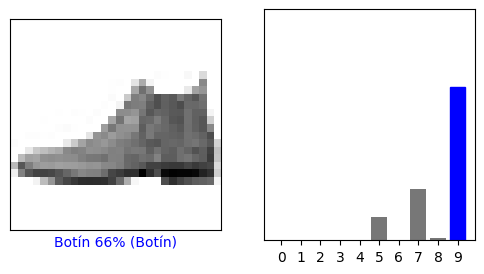

2


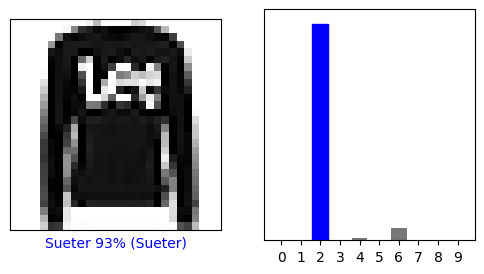

1


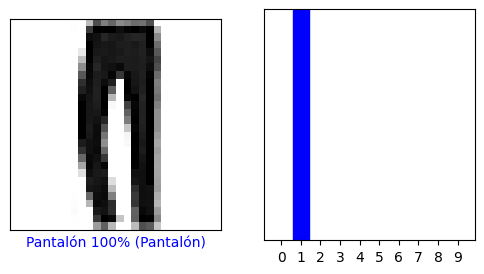

1


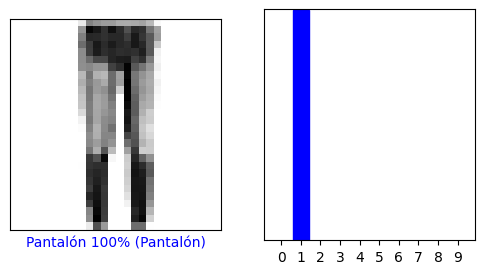

6


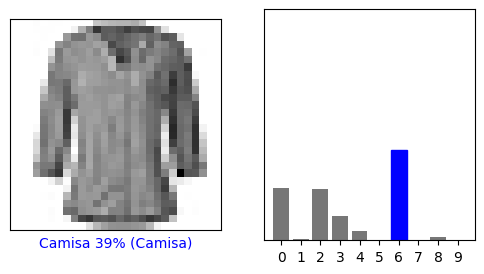

1


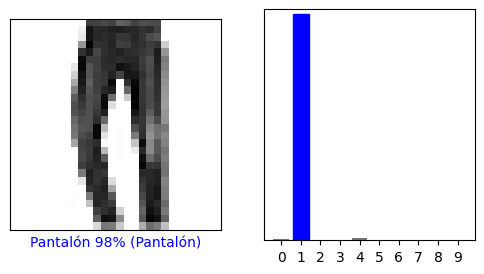

4


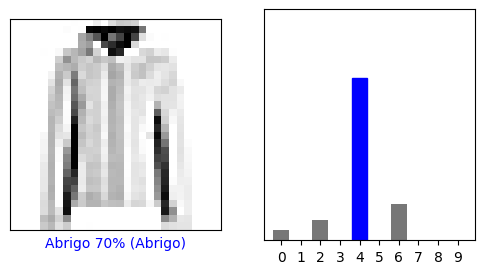

6


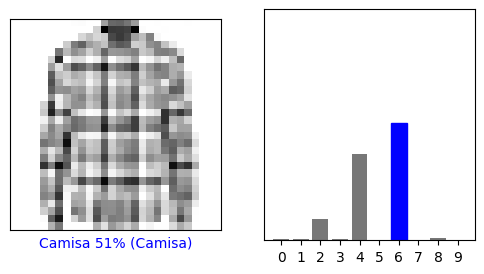

5


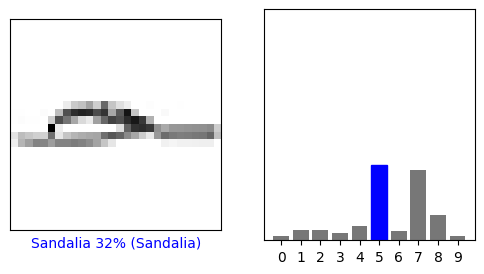

7


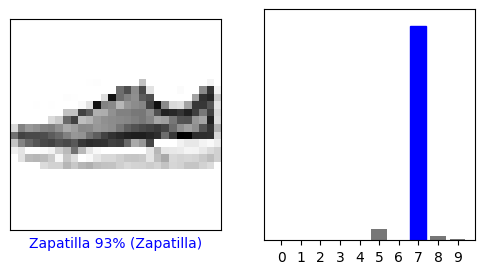

MODELO 2
Número de neuronas: 10
Función de activación: relu
Optimizador: rmsprop

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 2s 2ms/step - loss: 0.8486 - accuracy: 0.7285
Epoch 2/5
667/667 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8316
Epoc

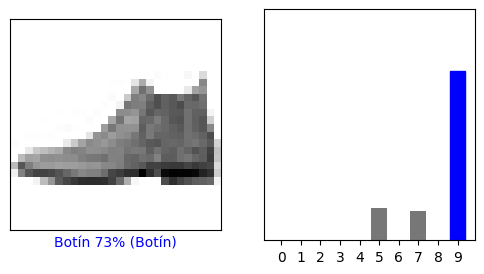

2


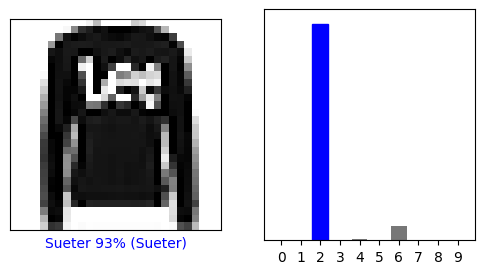

1


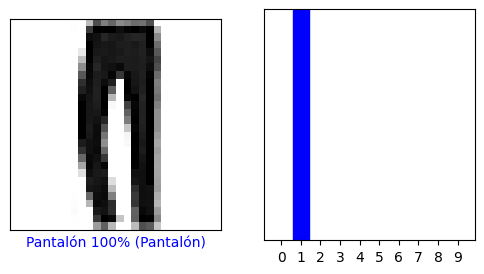

1


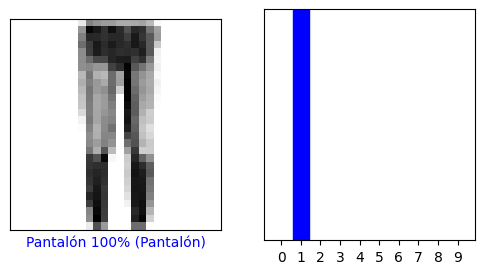

6


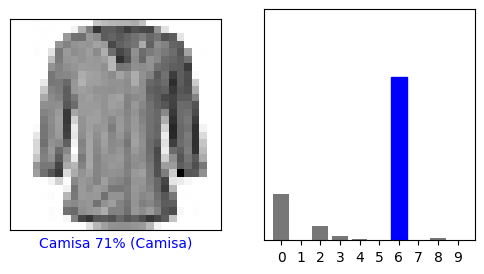

1


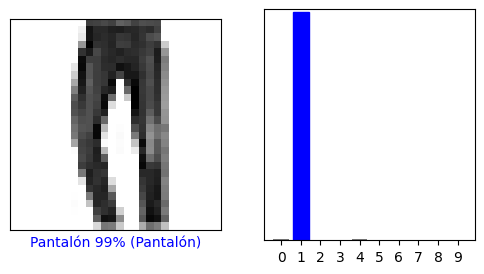

4


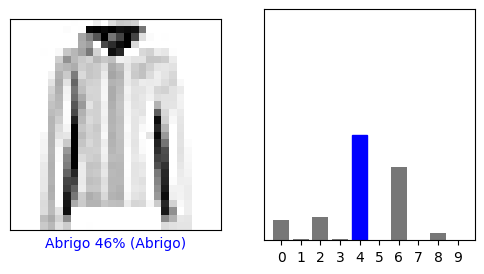

6


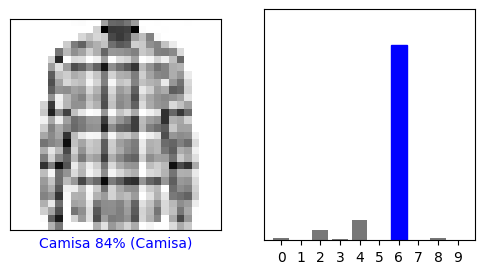

5


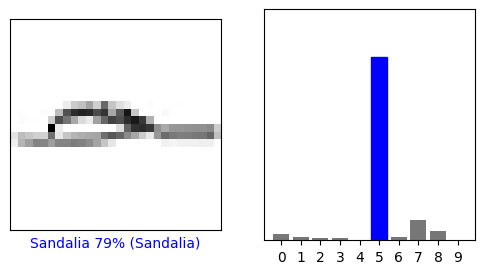

7


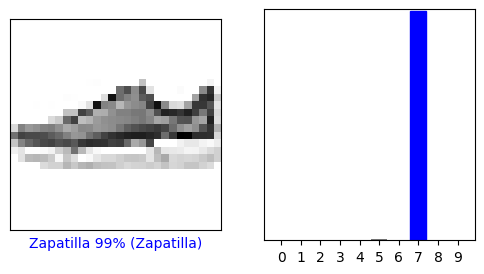

MODELO 3
Número de neuronas: 10
Función de activación: sigmoid
Optimizador: sgd

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 2s 2ms/step - loss: 2.1456 - accuracy: 0.3138
Epoch 2/5
667/667 [==============================] - 1s 2ms/step - loss: 1.7583 - accuracy: 0.5326
Epoch

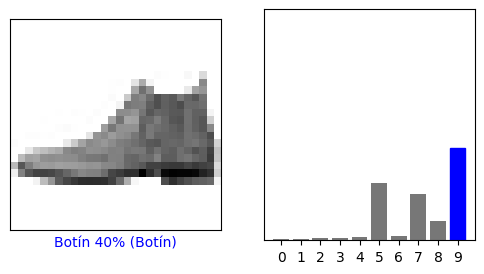

2


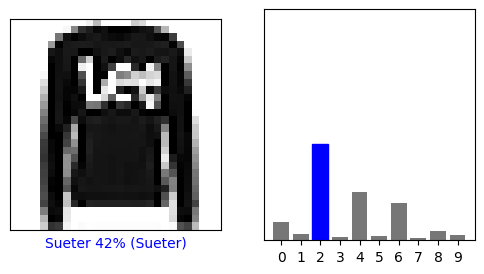

1


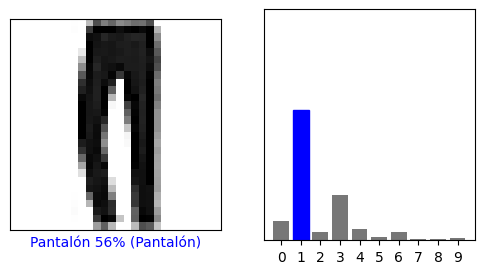

1


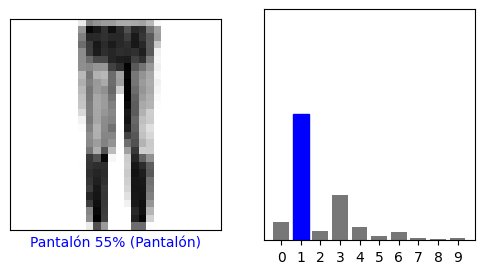

2


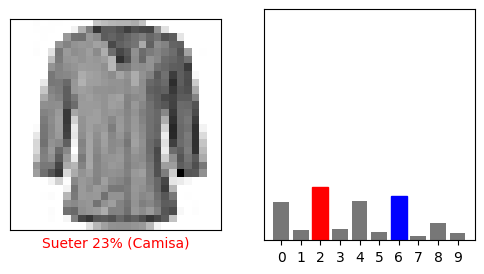

1


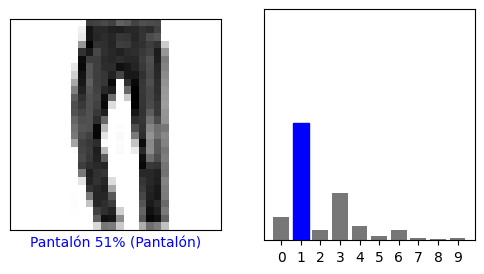

4


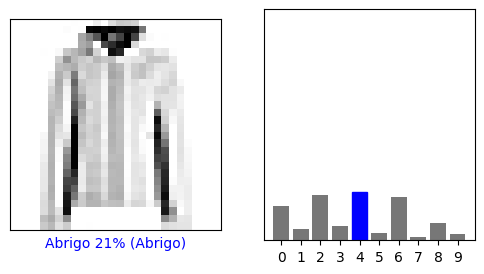

4


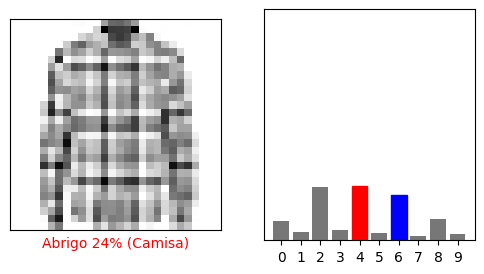

7


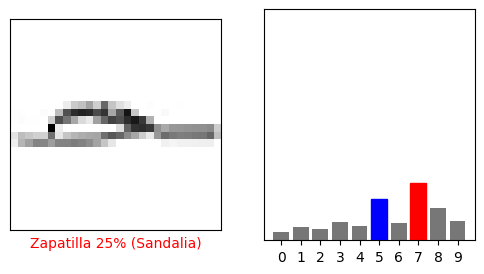

7


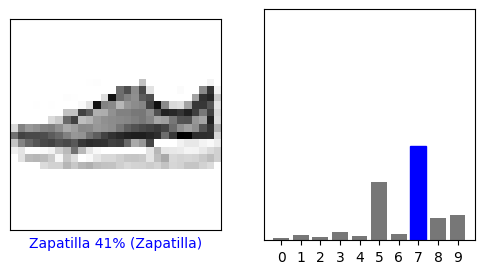

MODELO 4
Número de neuronas: 10
Función de activación: sigmoid
Optimizador: rmsprop

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 2s 2ms/step - loss: 1.2709 - accuracy: 0.6835
Epoch 2/5
667/667 [==============================] - 1s 2ms/step - loss: 0.7113 - accuracy: 0.7762
E

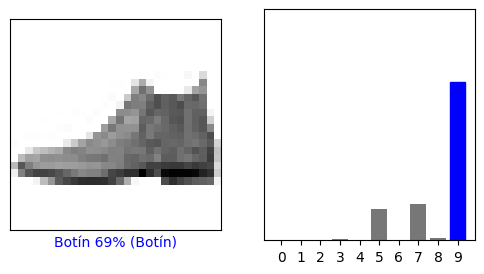

2


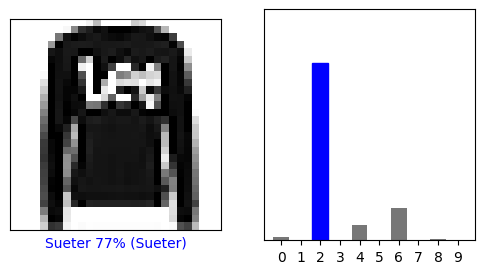

1


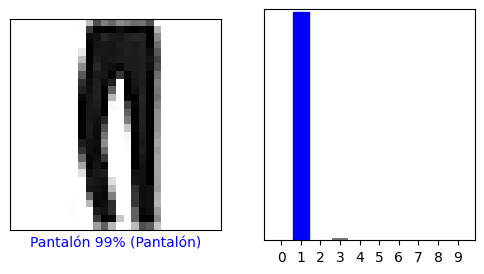

1


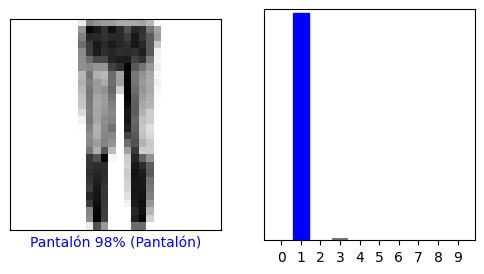

6


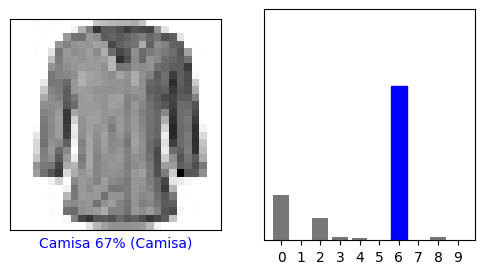

1


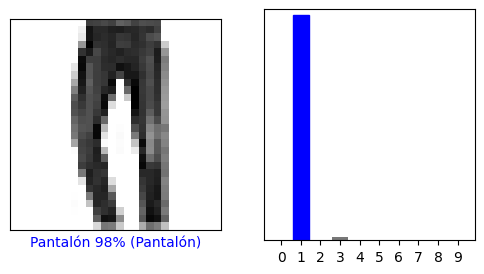

4


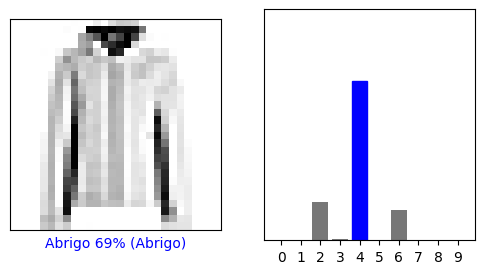

6


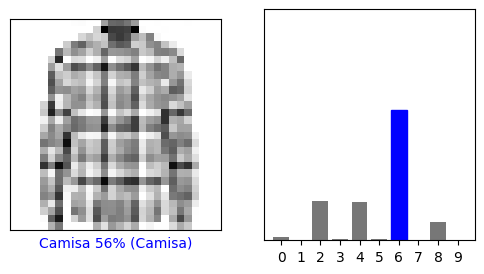

5


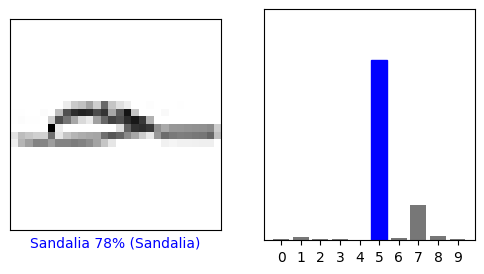

7


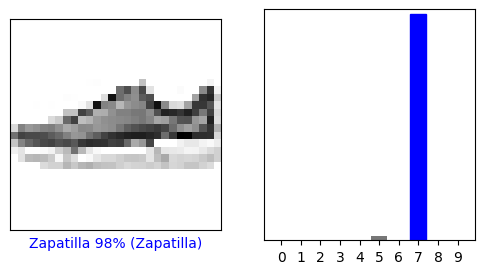

MODELO 5
Número de neuronas: 512
Función de activación: relu
Optimizador: sgd

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 6s 9ms/step - loss: 0.9230 - accuracy: 0.7177
Epoch 2/5
667/667 [==============================] - 5s 8ms/step - loss: 0.6072 - accuracy: 0.8047
Epoch

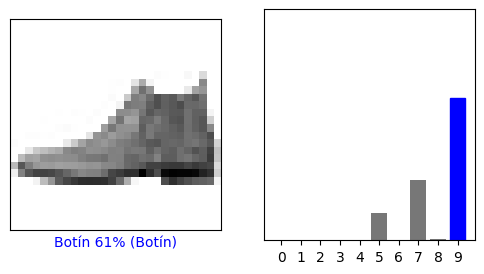

2


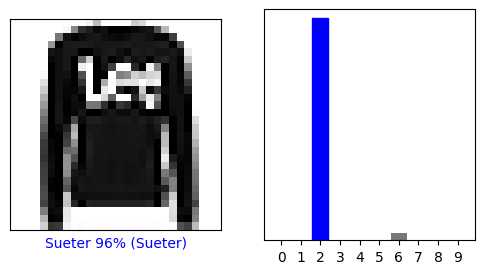

1


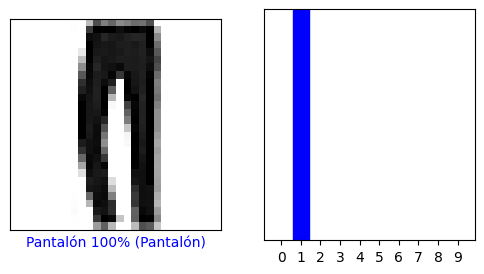

1


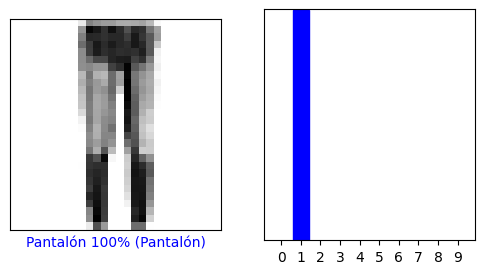

6


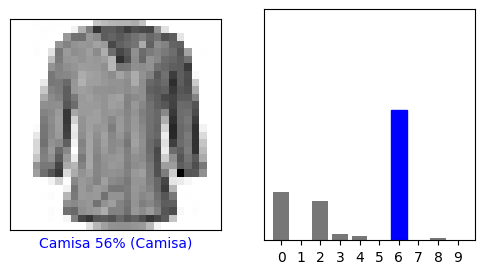

1


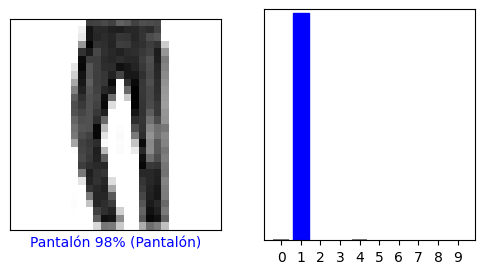

4


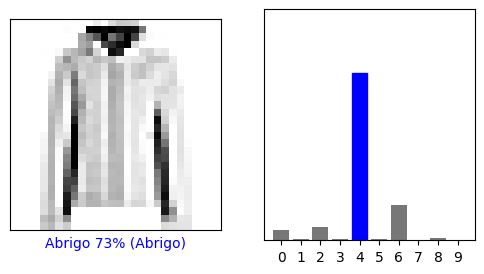

6


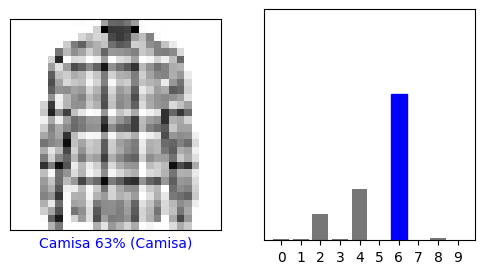

5


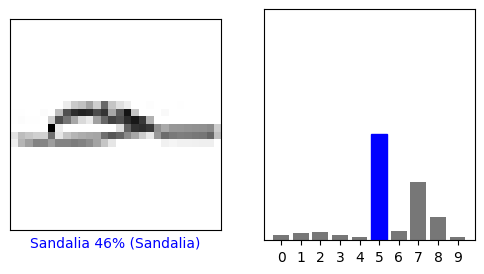

7


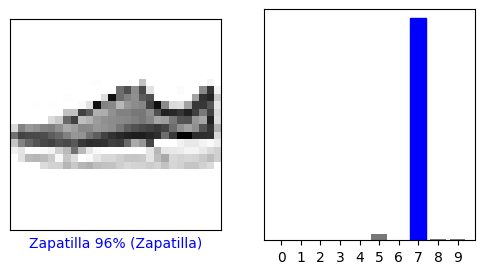

MODELO 6
Número de neuronas: 512
Función de activación: relu
Optimizador: rmsprop

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 6s 9ms/step - loss: 0.5343 - accuracy: 0.8100
Epoch 2/5
667/667 [==============================] - 7s 11ms/step - loss: 0.3757 - accuracy: 0.8617


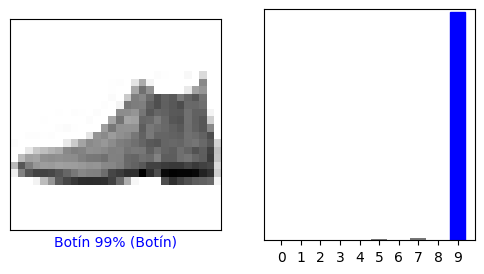

2


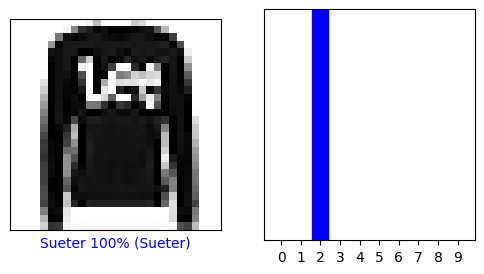

1


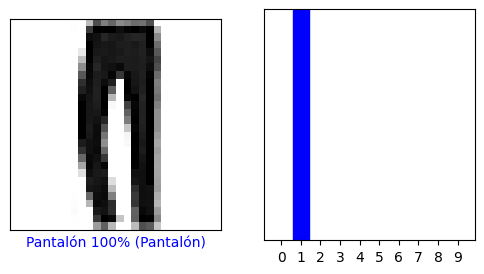

1


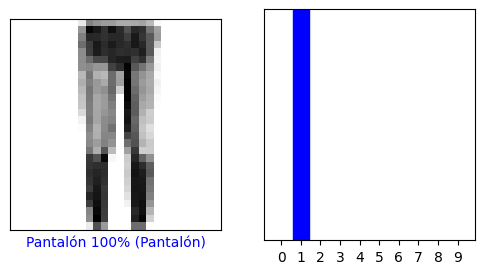

6


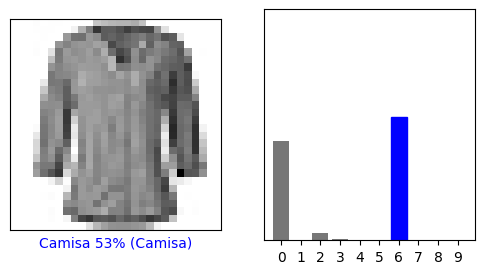

1


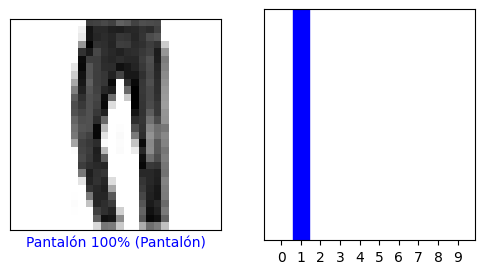

4


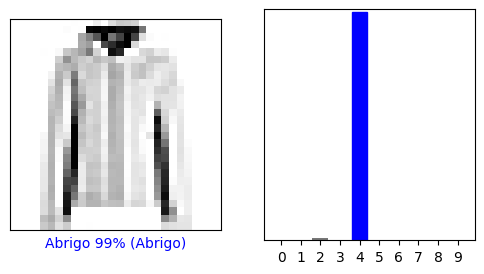

6


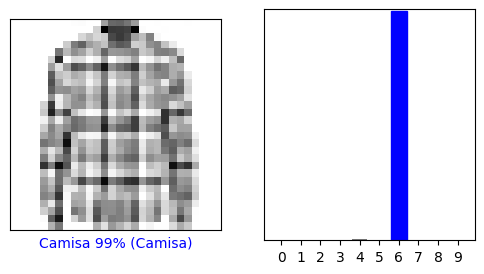

5


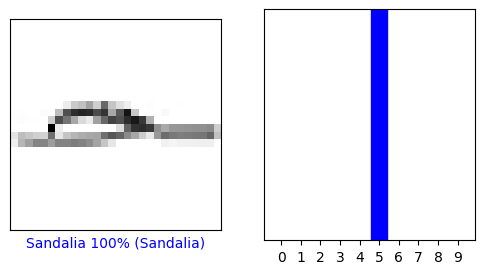

7


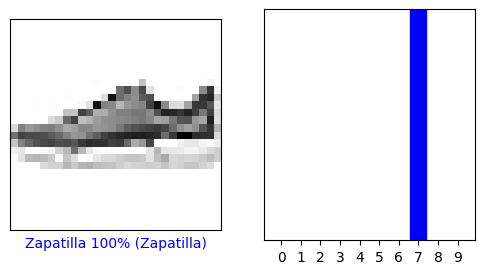

MODELO 7
Número de neuronas: 512
Función de activación: sigmoid
Optimizador: sgd

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 6s 9ms/step - loss: 1.5795 - accuracy: 0.6011
Epoch 2/5
667/667 [==============================] - 5s 7ms/step - loss: 0.9959 - accuracy: 0.7207
Ep

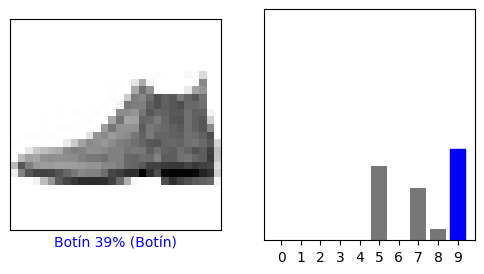

2


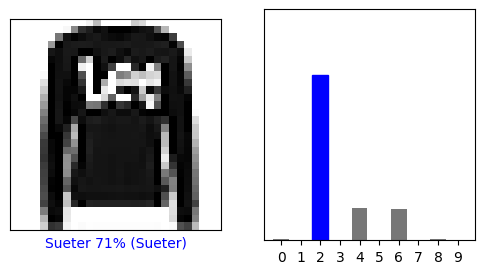

1


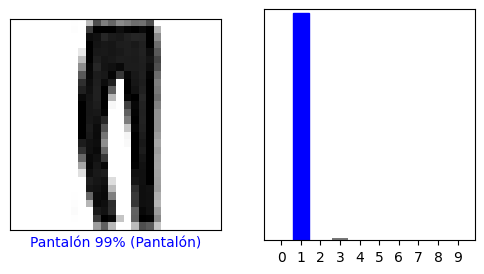

1


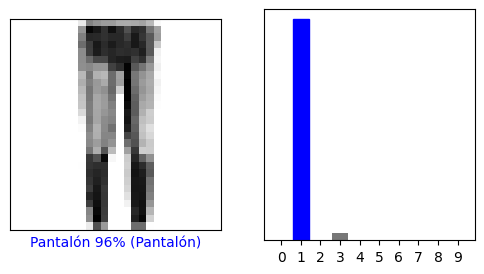

6


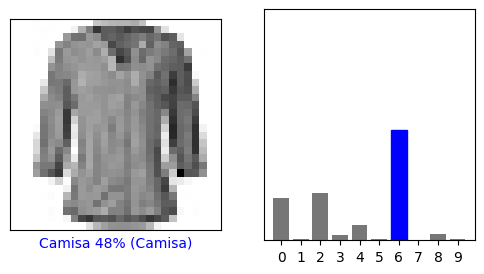

1


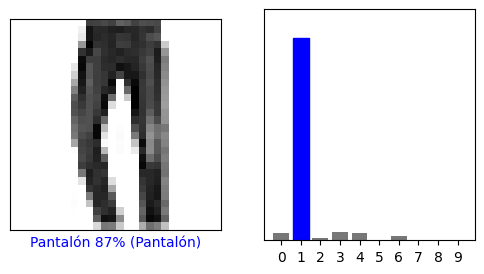

6


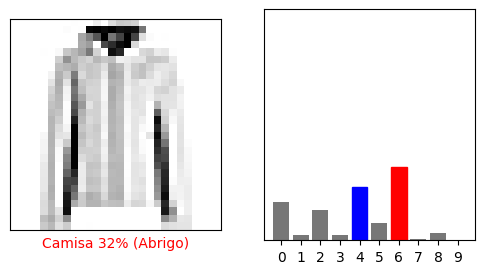

6


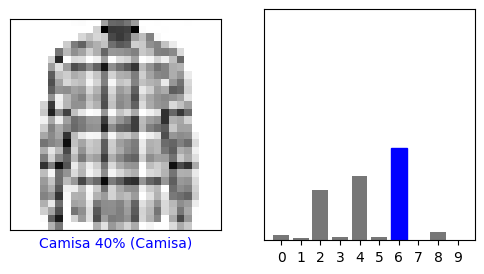

5


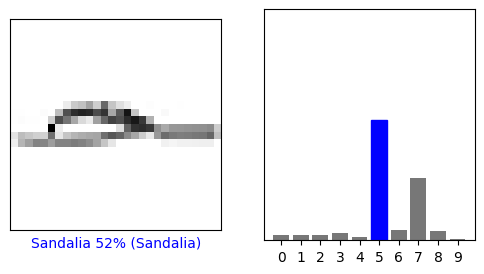

7


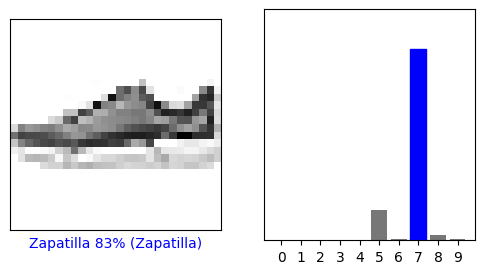

MODELO 8
Número de neuronas: 512
Función de activación: sigmoid
Optimizador: rmsprop

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 7s 9ms/step - loss: 0.5816 - accuracy: 0.7940
Epoch 2/5
667/667 [==============================] - 7s 10ms/step - loss: 0.4321 - accuracy: 0.84

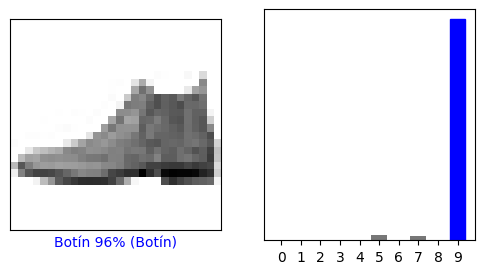

2


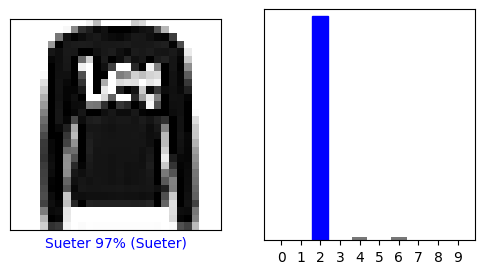

1


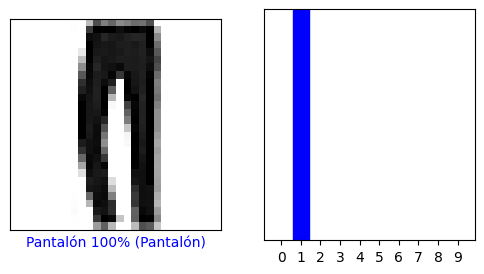

1


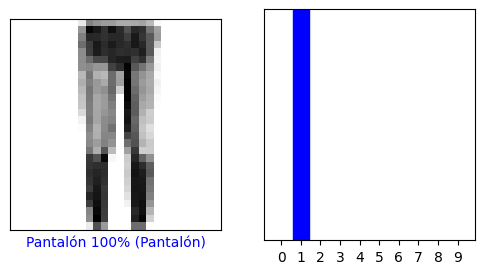

6


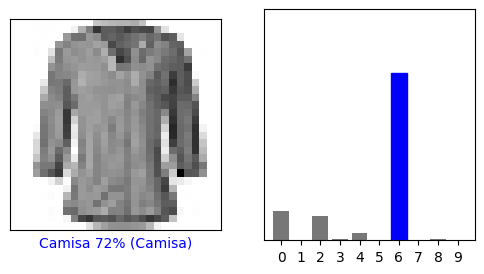

1


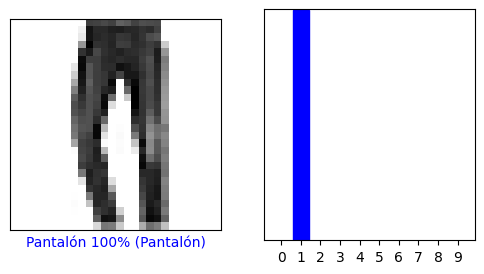

4


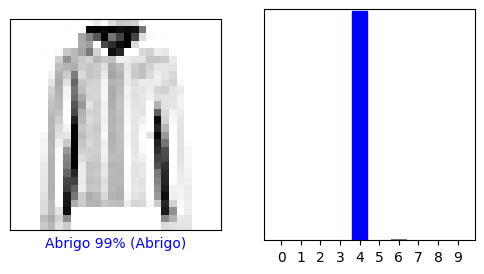

6


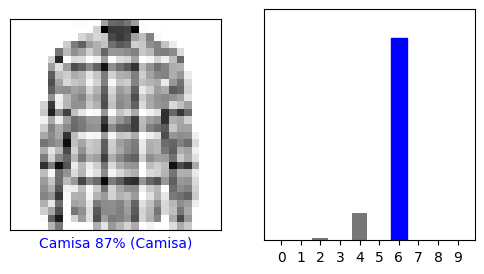

5


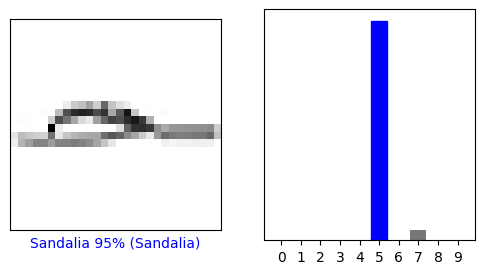

7


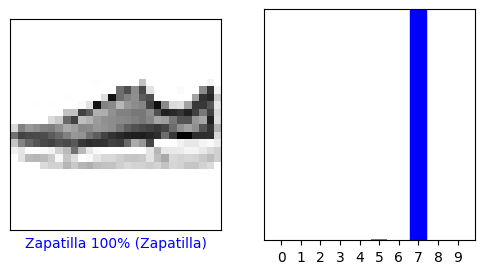

In [11]:
i=5

redes = [
        ('sgd', 10, 'relu', 5, 90),
        ('rmsprop', 10, 'relu', 5, 90),
        ('sgd', 10, 'sigmoid', 5, 90),
        ('rmsprop', 10, 'sigmoid', 5, 90),
        ('sgd', 512, 'relu', 5, 90),
        ('rmsprop', 512, 'relu', 5, 90),
        ('sgd', 512, 'sigmoid', 5, 90),
        ('rmsprop', 512, 'sigmoid', 5, 90)
    ]

t=1;

for k in redes:

        print(f"MODELO {t}")

        t=t+1;

        print(f"Número de neuronas: {k[1]}\nFunción de activación: {k[2]}\nOptimizador: {k[0]}\n")
        modelo = entrenamiento(k[0], k[1], k[2], k[3], k[4])

        evaluar(modelo)

        p=prediccion(modelo, i)

        for h in range (0, 10):
            plt.figure(figsize=(6, 3))
            plt.subplot(1, 2, 1)
            plot_image(h, p, test_labels, test_images)
            plt.subplot(1, 2, 2)
            plot_value_array(h, p, test_labels)
            plt.show()

        print(f"===================================================================")
        print(f"===================================================================")



---
---
**3.Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se
multiplica por 5 las épocas de entrenamiento (25)**

Se crea una lista de tuplas en las que cada una de ellas contienen información neuronal que se va a entrenar. El primer elemento, **rmsprop**/**sgd** representa el optimizador, que se utilizan para ajustar los parámetros de un modelo con el objetivo de minimizar una función de pérdida.
El segundo elemento pertenece al número de capas de la neurona.
**Relu/Sigmoid** representan la función de activación que vamos a utilizar por otro lado, introducimos la cantidad de épocas para el entrenamiento de la red. Por último intoducimos batch size.

La primera parte del resultado es un resumen del modelo, en el cual nos aparecen los tipos de capas que podemos encontar en nuestra red y el número de parámetros. En este caso, nos encontramos con dos capas densas y una capa Flatten.
La parte siguiente, muestra el proceso de entrenamiento. En este, se informa de la pérdida y precisión del modelo en cada época.

Se repite el mismo funcionamiento para el segundo modelo.

De esta forma podemos comparar los resultados de ambos modelos cuando se les multiplica por 5 épocas a cada uno con los originales y ver cual va funciona mejor en función de los resultados.

**En este caso vemos que cuando multiplicamos ambos modelos por cinco épocas de entrenamiento, el programa es más preciso.**

In [12]:
 redes2 = [('rmsprop', 10, 'relu', 25, 90),('sgd', 512, 'sigmoid', 25, 90)]

for k in redes2:
  modelo = entrenamiento (k[0], k[1], k[2], k[3], k[4])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
667/667 [==============================] - 2s 3ms/step - loss: 0.7074 - accuracy: 0.7665
Epoch 2/25
667/667 [==============================] - 2s 4ms/step - loss: 0.4909 - accuracy: 0.8316
Epoch 3/25
667/667 [==============================] - 1s 2ms/step - loss: 0.4524 - a

---
---
**7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.**

EL modelo del caso 3 con el optimizador sgd tenía una pérdida después del entrenamiento de 1.1036 pero al cambiar el optimizador la pérdida se reduce al 0.4842.

EL optimizador adam a diferencia del sgd ajusta automáticamente la tasa de aprendizaje para cada parámetro en función de su historia de gradientes. Esto significa que no es necesario ajustar manualmente la tasa de aprendizaje en la mayoría de los casos.

Se cambio tambien la funcion de pérdida, de categorical_crossentropy a sparse_categorical_crossentropy. Ambas sirven para problemas de clasificación, su principal diferencia radica en el tipo de entradas que necesitan ambas funciones. Sparse_categorical_crossentropy usa etiquetas que sean un número entero mientras que categorical_crossentropy utiliza one - hot encoding lo que puede ocupar más memoria.

En cuanto a la precisión, al terminar las 5 épocas, el caso 3 original mostraba una precisión de 0.6978, la cual, al cambiar el optimizador aumentó hasta 0.8374.

Podemos concluir ahora que de los 3 optimizadores utilizados el que mostró el peor rendimiento fue el sgd al no actualizar la tasa de aprendizaje al ir avanzando.


In [13]:
k = redes[2]

print(f"Número de neuronas: {k[1]}\nFunción de activación: {k[2]}\nOptimizador: adam \n")

modelo = entrenamiento2 ('adam', k[1], k[2], k[3], k[4])


Número de neuronas: 10
Función de activación: sigmoid
Optimizador: adam 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                7850      
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
667/667 [==============================] - 2s 2ms/step - loss: 1.2827 - accuracy: 0.6655
Epoch 2/5
667/667 [==============================] - 1s 2ms/step - loss: 0.7636 - accuracy: 0.7818
Epoch 3/5
6

**CONCLUSIONES Y DESARROLLO DEL PROYECTO**

En este estudio hemos demostrado la efectividad de las redes neuronales en la clasificación de prendas de vestir. Mediante distintos modelos de redes neuronales conseguimos ver la precisión de clasificación de diversas categorías de ropa.

Hemos usado diferentes optimizadores y funciones de activación de manera que hemos logrado observar como cada uno tenía sus ventajas y desventajas, por ejemplo, la función de activación ReLU generalmente ha proporcionado buenos resultados en términos de velocidad de convergencia y capacidad de representación no lineal.

En cuanto a optimizadores, Adam, ha demostrado converger más rápidamente en comparación con el descenso de gradiente estocástico (SGD), pero en algunos casos, SGD con un buen ajuste de tasa de aprendizaje ha superado al Adam en términos de rendimiento final.

El uso de una mayor cantidad de neuronas en la capa de entrada (512 en lugar de 10) no necesariamente garantiza un mejor rendimiento. A veces, los modelos más simples con 10 neuronas en la capa de entrada pueden funcionar igual de bien o incluso mejor, como se ve en el Modelo 2.

El tamaño del lote (batch size) es un hiperparámetro importante. En este caso, se observó que un tamaño de lote de 90 imágenes parece ser un equilibrio adecuado entre velocidad de entrenamiento y rendimiento.

En cuanto al sobreentrenamiento, la mayoría de los modelos no muestran signos claros de sobreajuste. Sin embargo, se puede mejorar aún más la generalización y la estabilidad del rendimiento a través de técnicas como la regularización y la validación cruzada.

En resumen, la elección de la arquitectura de la red neuronal, el optimizador y la función de activación puede tener un impacto significativo en el rendimiento del modelo. A través de la experimentación y la búsqueda de hiperparámetros óptimos, es posible lograr un mejor rendimiento en problemas de clasificación de imágenes, como el presente. Además, el monitoreo del sobreentrenamiento y el ajuste de los hiperparámetros son pasos clave para obtener los mejores resultados en este tipo de aplicaciones.

**TRABAJO EN EQUIPO**

El proyecto se ha desarrollado de manera colaborativa, involucrando la participación de todos los miembros del equipo. El proceso se inició con una comprensión integral de los conceptos relevantes, asegurándonos de que todos los involucrados tuvieran una base sólida en los temas vistos en clases anteriores.

Una vez establecido un conocimiento común, nos reunimos para comenzar la implementación del código. Este proceso se llevó a cabo de manera conjunta, donde cada miembro contribuyó en la creación de funciones específicas. En situaciones en las que surgieron dificultades, el grupo trabajó de manera colaborativa para abordar y resolver los problemas identificados.

Uno de los obstáculos encontrados durante el desarrollo del proyecto estuvo relacionado con la representación gráfica de los datos. En este punto, experimentamos dificultades para obtener gráficos que reflejaran con precisión la información que estábamos buscando presentar. Trabajamos juntos para superar estas dificultades y lograr visualizaciones coherentes con nuestros objetivos.

Finalmente, se llevó a cabo un proceso de revisión y documentación en el que cada miembro del equipo explicó las funciones que habían implementado, asegurándonos de que todos comprendieran completamente el código en su totalidad.

A lo largo de este proceso, dedicamos esfuerzo y tiempo significativos para consolidar y documentar el conocimiento adquirido durante la realización del proyecto, lo que ha contribuido a la finalización exitosa de la práctica.